In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
data=pd.read_csv(r'C:/Users/HP/Downloads/pakistna-crime-data.csv')


In [4]:
# Count of Rows and Columns
print(data.shape)

(60, 11)


In [5]:
data.head()

,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
0,2012,Murder,6128,3726,2958,711,120,6,102,95,13846
1,2012,Attempt to Murder,7641,3732,2892,583,146,9,163,172,15338
2,2012,Kidnapping /Abduction,15699,3077,1052,386,70,6,32,288,20610
3,2012,Dacoity,2715,1341,60,98,22,1,8,12,4257
4,2012,Robbery,12181,4320,134,160,177,5,26,78,17081


In [6]:
# Ending rows visualization
data.tail()

,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
55,2017,Burglary,11023,1344,798,135,253,1,63,216,13833
56,2017,Cattle Theft,4721,383,126,39,22,0,17,34,5342
57,2017,Other Theft,33053,2221,882,272,506,234,64,72,37304
58,2017,Others,325149,57409,172504,7917,5798,1270,1370,6194,577611
59,2017,TOTAL RECORDED CRIME,405845,70273,180830,9492,7136,1528,1736,7085,683925


In [7]:
# Display basic information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         60 non-null     int64 
 1   Offence      60 non-null     object
 2   Punjab       60 non-null     int64 
 3   Sindh        60 non-null     int64 
 4   KP           60 non-null     int64 
 5   Balochistan  60 non-null     int64 
 6   Islamabad    60 non-null     int64 
 7   Railways     60 non-null     int64 
 8   G.B          60 non-null     int64 
 9   AJK          60 non-null     int64 
 10  Pakistan     60 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 5.3+ KB
None


Data Cleaning

In [8]:
data.isnull().sum()

Year           0
Offence        0
Punjab         0
Sindh          0
KP             0
Balochistan    0
Islamabad      0
Railways       0
G.B            0
AJK            0
Pakistan       0
dtype: int64

In [10]:
data.duplicated().sum()

0

Data Preprocessing

In [51]:
data = data[ data['Offence'] != 'TOTAL RECORDED CRIME']

In [52]:
# Replace Kidnapping /Abduction with Kidnapping
data['Offence'].mask(data['Offence'] == 'Kidnapping /Abduction', 'Kidnapping', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6932\2297532979.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Offence'].mask(data['Offence'] == 'Kidnapping /Abduction', 'Kidnapping', inplace=True)


EDA

In [53]:
# Basic statistics
print(data.describe())

              Year         Punjab         Sindh             KP  Balochistan  \
count    54.000000      54.000000     54.000000      54.000000    54.000000   
mean   2014.500000   43919.944444   8201.870370   17285.462963   976.759259   
std       1.723861   94093.671759  17355.928958   46465.651329  2111.704480   
min    2012.000000     602.000000    383.000000      45.000000    30.000000   
25%    2013.000000    5497.250000   1362.250000     158.500000   137.000000   
50%    2014.500000   11304.500000   2432.000000     967.000000   248.000000   
75%    2016.000000   14686.750000   3206.000000    2829.250000   385.000000   
max    2017.000000  328610.000000  58794.000000  172504.000000  7917.000000   

         Islamabad     Railways          G.B          AJK       Pakistan  
count    54.000000    54.000000    54.000000    54.000000      54.000000  
mean    843.185185   193.240741   171.370370   666.611111   72258.444444  
std    1871.549697   442.224477   353.876073  1568.656479  1639

In [54]:
# Unique crime types
print(data['Offence'].unique())

['Murder' 'Attempt to Murder' 'Kidnapping' 'Dacoity' 'Robbery' 'Burglary'
 'Cattle Theft' 'Other Theft' 'Others']


In [55]:
# Number of crimes by type
crime_counts = data['Offence'].value_counts()
print(crime_counts)

Offence
Murder               6
Attempt to Murder    6
Kidnapping           6
Dacoity              6
Robbery              6
Burglary             6
Cattle Theft         6
Other Theft          6
Others               6
Name: count, dtype: int64


Data Visualization
Visualize the data to identify trends and patterns.

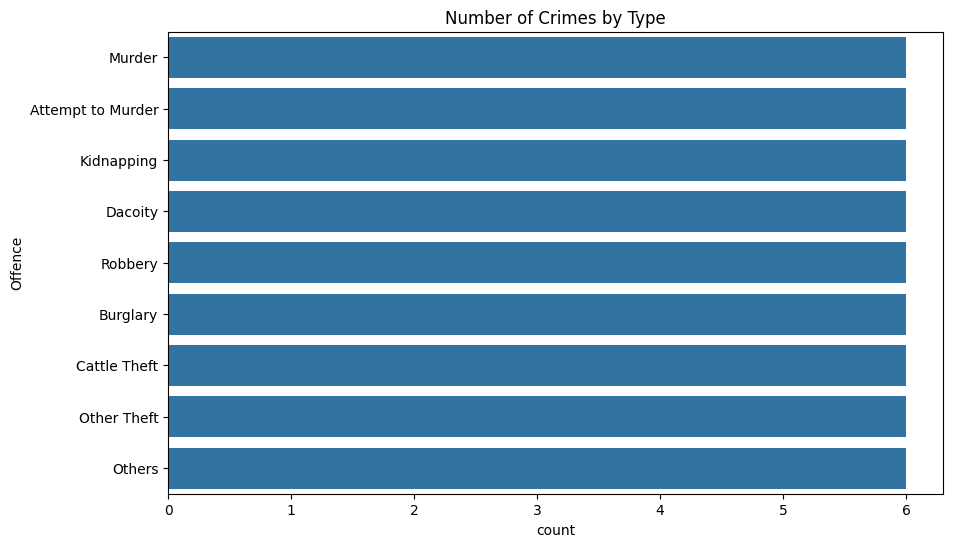

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot number of crimes by type
plt.figure(figsize=(10, 6))
sns.countplot(y='Offence', data=data, order=data['Offence'].value_counts().index)
plt.title('Number of Crimes by Type')
plt.show()

Statistical Analysis

In [58]:
# Filter the data for the year 2017
df_2017 = data[data['Year'] == 2017]

df_2017

,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
50,2017,Murder,3914,1409,2361,325,84,6,61,75,8235
51,2017,Attempt to Murder,4440,1644,2641,333,163,5,94,179,9499
52,2017,Kidnapping,13558,2927,1197,248,99,7,48,279,18363
53,2017,Dacoity,602,572,45,38,16,1,4,2,1280
54,2017,Robbery,9385,2364,276,185,195,4,15,34,12458
55,2017,Burglary,11023,1344,798,135,253,1,63,216,13833
56,2017,Cattle Theft,4721,383,126,39,22,0,17,34,5342
57,2017,Other Theft,33053,2221,882,272,506,234,64,72,37304
58,2017,Others,325149,57409,172504,7917,5798,1270,1370,6194,577611


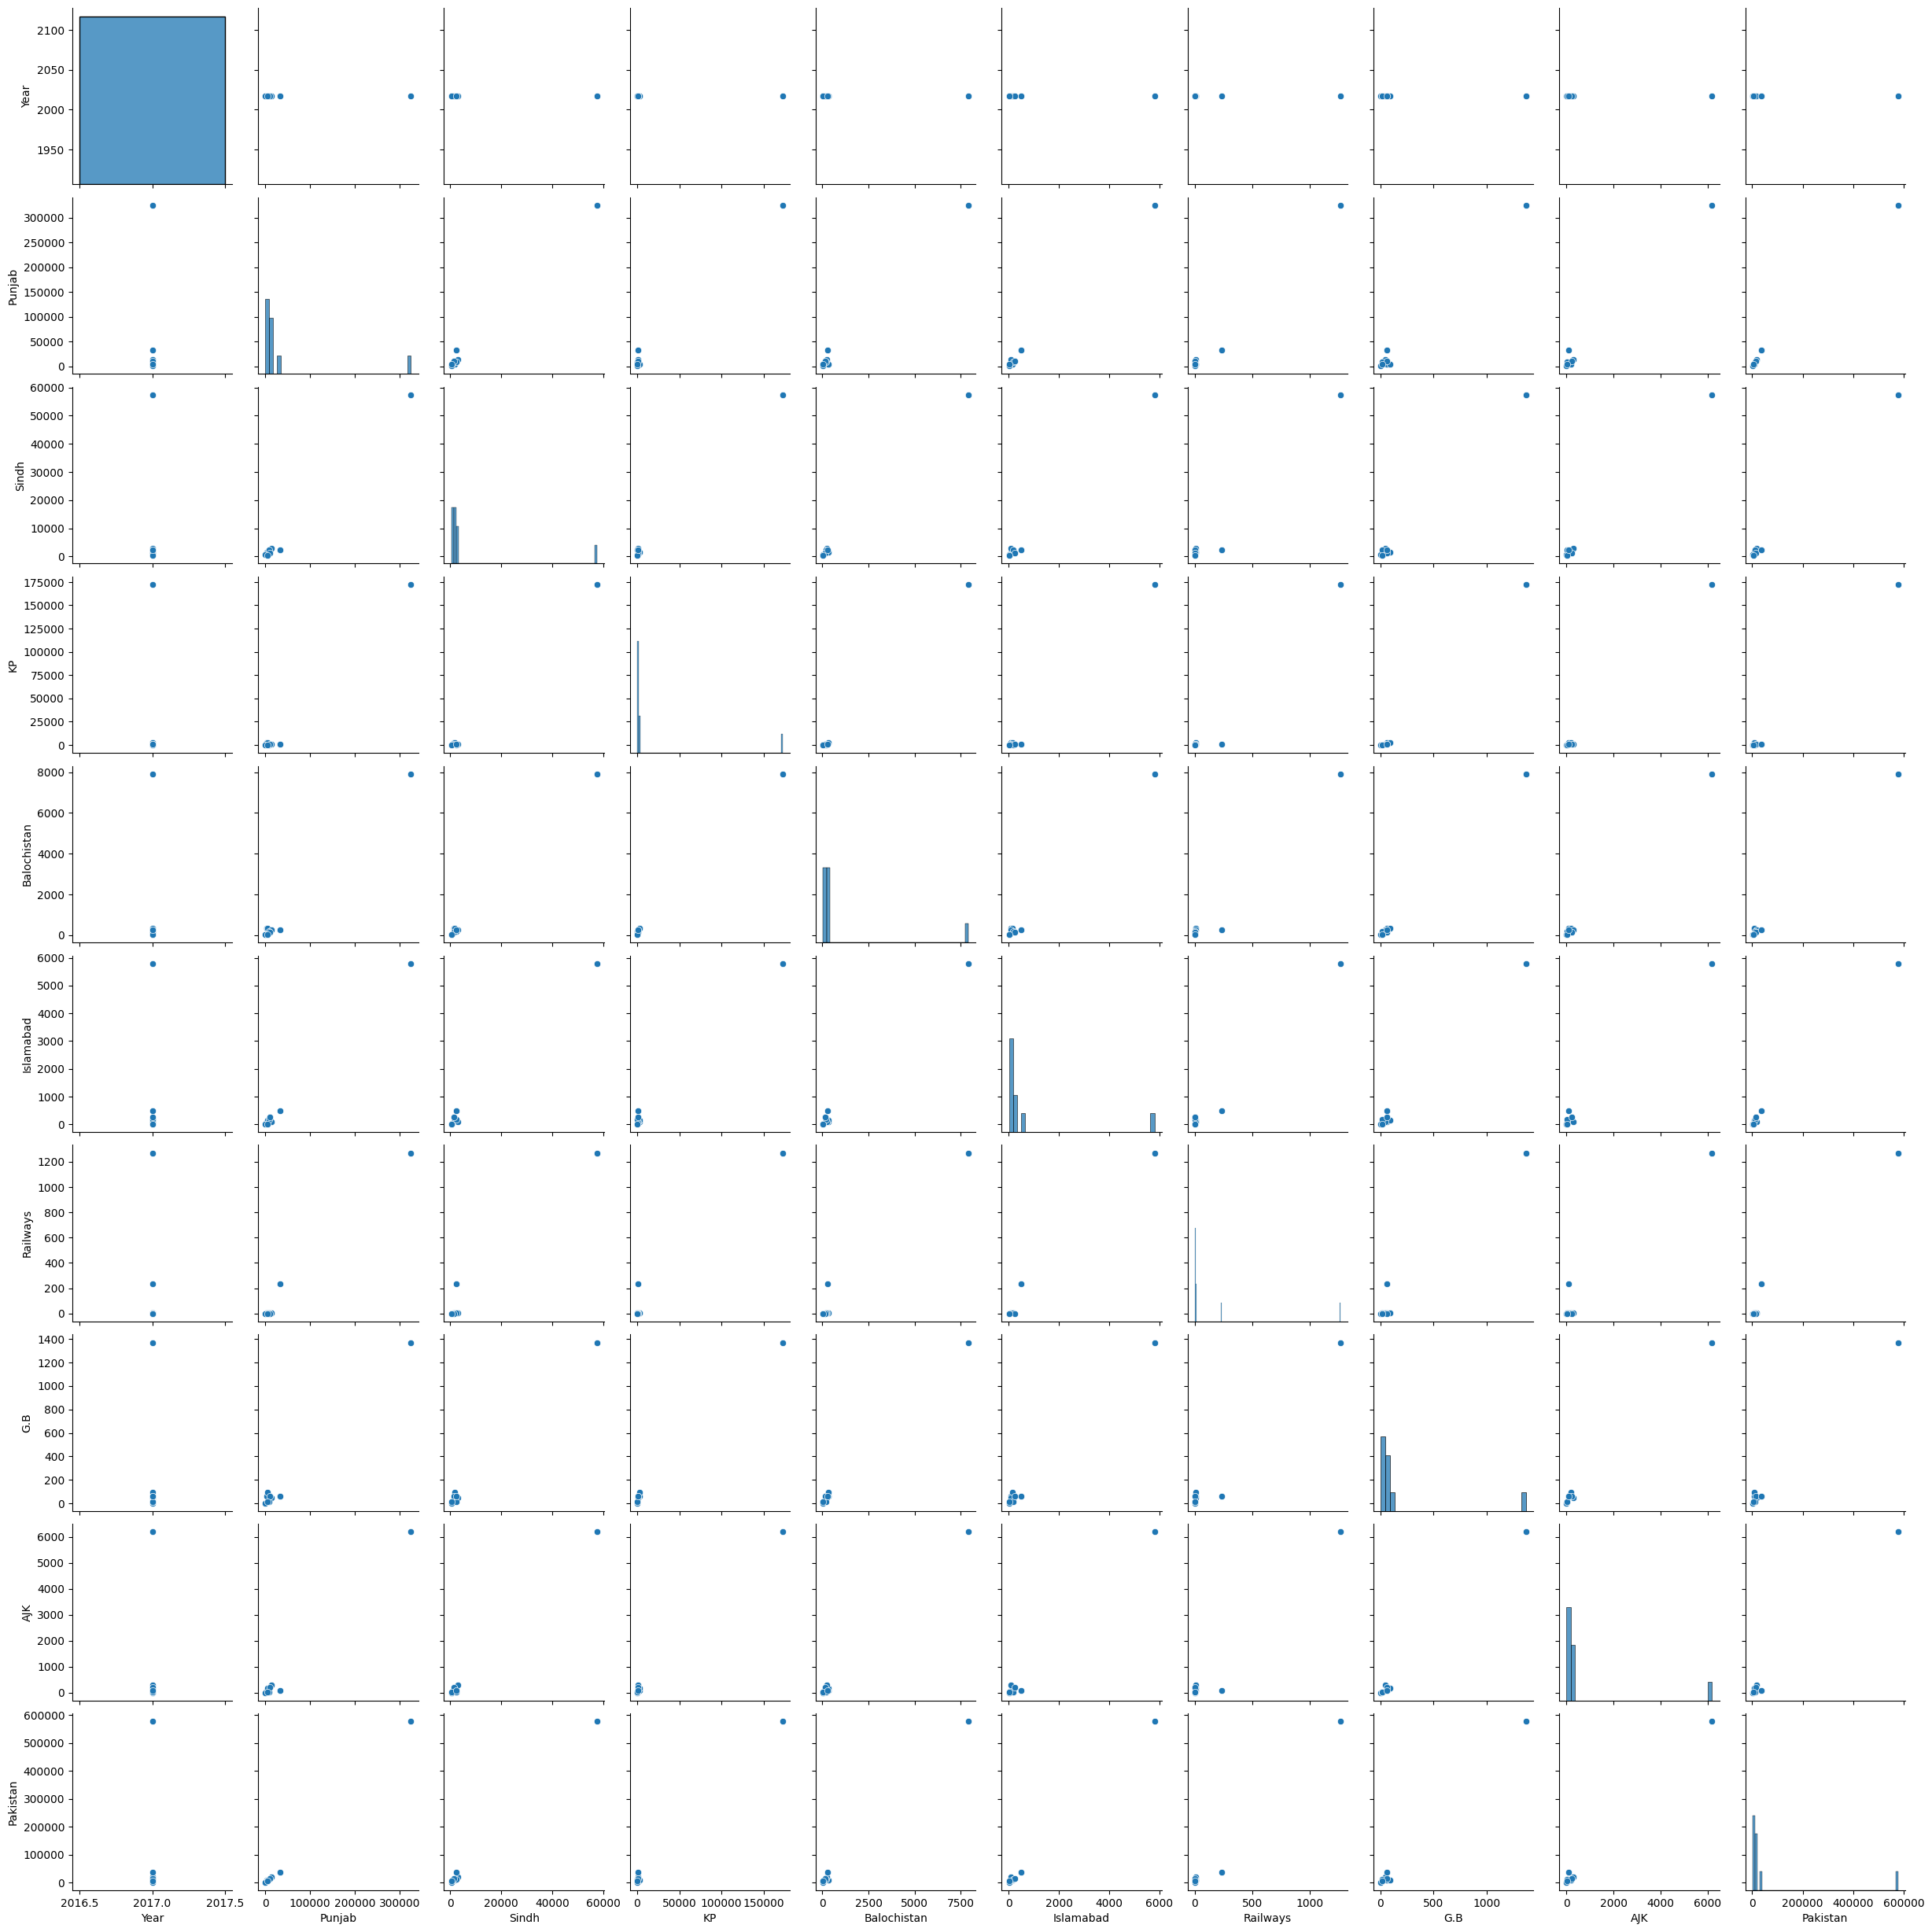

In [59]:
# Create a pair plot for the filtered data
sns.pairplot(df_2017)
plt.show()

Heat MAp 

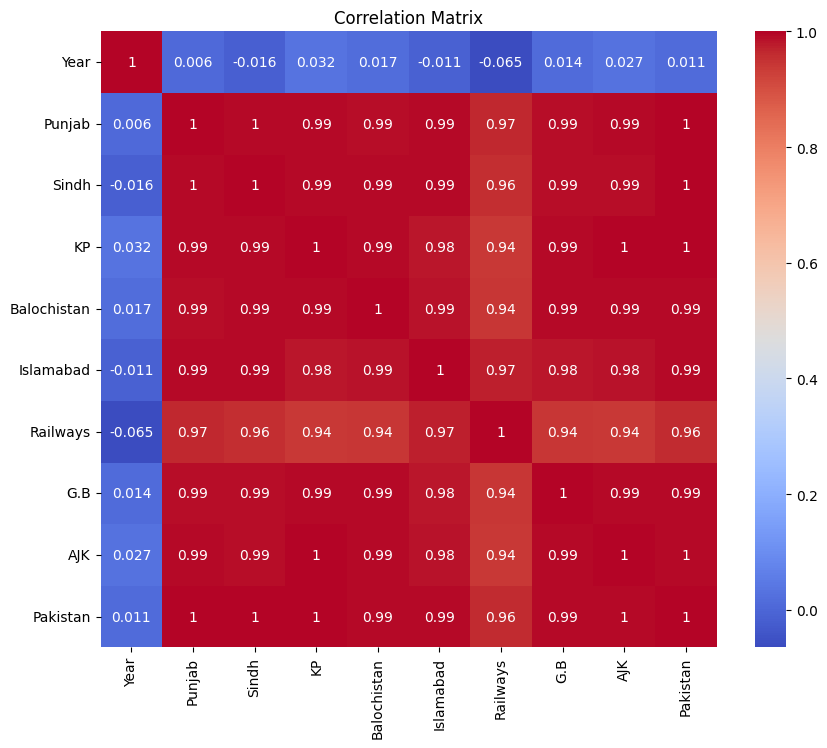

In [73]:
# Assuming 'Murder' is a string column that needs to be excluded
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns

# Compute correlation matrix
correlation = numeric_data.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [66]:
# Create a list of offences you want to filter for
offences = ['Murder', 'Attempt to Murder', 'Abduction']

# Filter the DataFrame
df1 = data[data['Offence'].isin(offences)]
df1

,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
0,2012,Murder,6128,3726,2958,711,120,6,102,95,13846
1,2012,Attempt to Murder,7641,3732,2892,583,146,9,163,172,15338
10,2013,Murder,5969,3854,3163,639,131,4,73,104,13937
11,2013,Attempt to Murder,6935,3568,3146,482,203,7,96,211,14648
20,2014,Murder,5953,3225,3184,615,144,4,74,77,13276
21,2014,Attempt to Murder,7204,3017,3281,465,164,6,109,253,14499
30,2015,Murder,4422,1907,2496,412,116,3,54,76,9486
31,2015,Attempt to Murder,5234,2280,3008,356,131,7,98,222,11336
40,2016,Murder,3995,1445,2481,382,94,2,67,50,8516
41,2016,Attempt to Murder,4647,1955,2900,340,141,4,84,208,10279


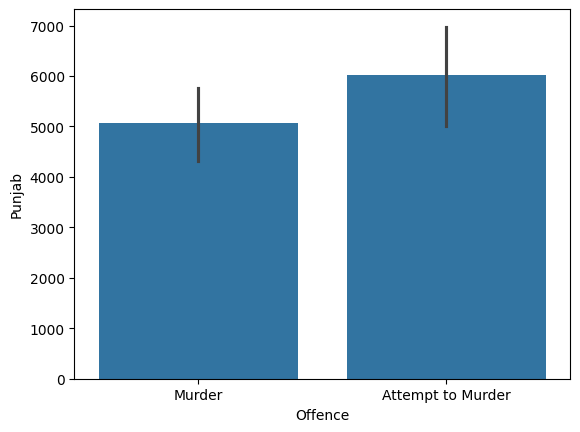

In [67]:
df1 = sns.barplot(df1, x='Offence',y='Punjab')


In [70]:
# Create a new DataFrame excluding the specified offences
df2 = data[~data['Offence'].isin(offences)]
df2

,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
2,2012,Kidnapping,15699,3077,1052,386,70,6,32,288,20610
3,2012,Dacoity,2715,1341,60,98,22,1,8,12,4257
4,2012,Robbery,12181,4320,134,160,177,5,26,78,17081
5,2012,Burglary,14740,1680,500,117,245,0,101,255,17638
6,2012,Cattle Theft,8115,630,118,77,43,0,23,40,9046
7,2012,Other Theft,34719,2976,717,332,585,560,71,142,40102
8,2012,Others,292665,57206,139344,5745,5699,1528,1033,4509,507729
12,2013,Kidnapping,14527,3149,1137,304,112,2,32,288,19551
13,2013,Dacoity,2479,1354,66,85,52,2,2,13,4053
14,2013,Robbery,12609,4045,145,189,288,4,16,67,17363


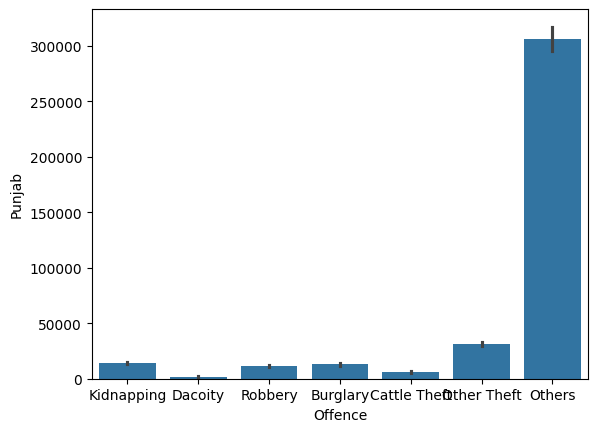

In [71]:
df2 = sns.barplot(df2, x='Offence',y='Punjab')